In [2]:
pip install pandas

     ---------------------------------------- 10.5/10.5 MB 1.0 MB/s eta 0:00:00
     -------------------------------------- 503.5/503.5 KB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Python\python.exe -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import os
import glob
from datetime import datetime
# import timestamp
import matplotlib.pyplot as plt

# import heartpy as hp

In [4]:

class Data():
    def __init__(self, path = None):
        
        self.directory = (glob.glob("/Data*merged.csv")) 
        # Add All the functionality to the class for organisation
        self.dailyNames = (glob.glob("daily*merged.csv")) 


        self.init()
        self.pdfs = []
        self.dailies = {}
    def init(self):
        for idx, dataName in enumerate(self.directory):
            self.pdfs.append(self.getDF(-1,dataName))

        for idx, data in enumerate(self.dailyNames):
            self.dailies[data]  =self.getDF(data)


    def getDF(self, i, byname =0):
        if(byname != 0):
            return(pd.read_csv(byname))
        return(pd.read_csv(self.directory[i]))





def containTimeInstant():
    timeList = ["time, "]

def read_file(path, expend_print = False, convertTimeDate = False):
    """ 
    read files
    """
    # formatting to pandas
    pd.Timestamp('2014-01-23 00:00:00', tz=None).to_pydatetime()

    print(path)
    
    # read csv
    df  = pd.read_csv(path)
    if(expend_print):
        print(path)
        print(f"Size: {df.shape}")
        print(df.head(10))
        print(df.columns)
        print((df.Id.unique()))
        print((list(df.columns)))
    df.dropna(subset=list(df.columns), how='any', axis=0).reset_index(inplace = True)

    if(convertTimeDate):
        pass

    ID = "Id"
    if ID in list(df.columns):
        # df['date_column'] = pd.to_datetime(df['datetime_column']).dt.date
        return df
    return None


def saved_file(df, name ):
    df.to_csv(f'{name}.csv')

def merge_data_to_one(files, safefile = False, saveFileName = "OutputMerged"):
    outputMerged = pd.DataFrame()
    
    for idx, fileName in enumerate(set(files)):
        data = read_file(fileName)
        if isinstance(data, pd.DataFrame):
            print(fileName)
            if(idx<1):
                outputMerged = data
            else:
                pd.merge(outputMerged, data, on = 'Id', how="left")
    
    if safefile: saved_file(outputMerged, saveFileName)


def compareSimilarity(A, B):
    A.sort()
    B.sort()

    max_val = max([len(A),len(B)])

    if max_val == len(A):arrMax, secondMax =A, B 
    else: arrMax, secondMax =A, B = A, B 
    
    sumCountSimilarities = 0

    sum_=0
    for i in list(arrMax):
        for j in list(secondMax):
            if i==j:
                if i<j : break
                sumCountSimilarities+=1
                break
             
    return (sumCountSimilarities, sumCountSimilarities/max_val)


def compareamountof(lists):
    l = len(lists)
    output = []

    for i in range(l):
        for j in range(i, l):
            A = read_file(lists[i])
            B = read_file(lists[j])


            similarities, ratiosim = compareSimilarity(A.Id.unique(), B.Id.unique())
            output.append([lists[i], lists[j],similarities, ratiosim])

    return output


def divideInsertTime(data, colName):
    # time_col_split = data.colName.str.split(" ")
    # split_amount = len(list(time_col_split[0]))

    date = pd.to_datetime(data[colName])
    try:
        Id_To_Idx = {id :num for num,id in enumerate(Heart_By_Idx.Id.unique())}
        Heart_By_Idx['PersonID'] = data.Id.map(Id_To_Idx)

        data["Hour"] = date.dt.hour
        data["Day"]  = date.dt.day 
        data["Minute"] = date.dt.minute
        data["DateOfWeek"] = date.dt.day_name()      
        print("Date Changed")
    except:
        e = sys.exc_info()
        print(f"Could Not Prase Data: Check Col Name; Erorr: {sys.exc_info()}")        

    return data



#TODO : Set Index: data.set_index("Id")

In [25]:
data_csvs = (glob.glob("../Data/*merged.csv")) 
data_csvs


['../Data\\dailyActivity_merged.csv',
 '../Data\\dailyCalories_merged.csv',
 '../Data\\dailyIntensities_merged.csv',
 '../Data\\dailySteps_merged.csv',
 '../Data\\heartrate_seconds_merged.csv',
 '../Data\\hourlyCalories_merged.csv',
 '../Data\\hourlyIntensities_merged.csv',
 '../Data\\hourlySteps_merged.csv',
 '../Data\\minuteCaloriesNarrow_merged.csv',
 '../Data\\minuteCaloriesWide_merged.csv',
 '../Data\\minuteIntensitiesNarrow_merged.csv',
 '../Data\\minuteIntensitiesWide_merged.csv',
 '../Data\\minuteMETsNarrow_merged.csv',
 '../Data\\minuteSleep_merged.csv',
 '../Data\\minuteStepsNarrow_merged.csv',
 '../Data\\minuteStepsWide_merged.csv',
 '../Data\\sleepDay_merged.csv',
 '../Data\\weightLogInfo_merged.csv']

In [19]:
dailyData

['../Data\\dailyActivity_merged.csv',
 '../Data\\dailyCalories_merged.csv',
 '../Data\\dailyIntensities_merged.csv',
 '../Data\\dailySteps_merged.csv']

In [21]:
dailyData = (glob.glob("../Data/daily*merged.csv"))  +  (glob.glob("../Data/heartrate*merged.csv")) 


In [22]:
print(compareamountof(dailyData))

../Data\dailyActivity_merged.csv
../Data\dailyActivity_merged.csv
../Data\dailyActivity_merged.csv
../Data\dailyCalories_merged.csv
../Data\dailyActivity_merged.csv
../Data\dailyIntensities_merged.csv
../Data\dailyActivity_merged.csv
../Data\dailySteps_merged.csv
../Data\dailyActivity_merged.csv
../Data\heartrate_seconds_merged.csv
../Data\dailyCalories_merged.csv
../Data\dailyCalories_merged.csv
../Data\dailyCalories_merged.csv
../Data\dailyIntensities_merged.csv
../Data\dailyCalories_merged.csv
../Data\dailySteps_merged.csv
../Data\dailyCalories_merged.csv
../Data\heartrate_seconds_merged.csv
../Data\dailyIntensities_merged.csv
../Data\dailyIntensities_merged.csv
../Data\dailyIntensities_merged.csv
../Data\dailySteps_merged.csv
../Data\dailyIntensities_merged.csv
../Data\heartrate_seconds_merged.csv
../Data\dailySteps_merged.csv
../Data\dailySteps_merged.csv
../Data\dailySteps_merged.csv
../Data\heartrate_seconds_merged.csv
../Data\heartrate_seconds_merged.csv
../Data\heartrate_secon

In [ ]:
len(read_file(dailyData[2]).Id.unique())

33

In [101]:
steps = read_file(data_csvs[3])
steps.ActivityDay = pd.to_datetime(steps["ActivityDay"])
steps.rename(columns={"ActivityDay": "Day"}, inplace=True)
steps

../Data\dailySteps_merged.csv


,Id,Day,StepTotal
0,1503960366,2016-04-12,13162
1,1503960366,2016-04-13,10735
2,1503960366,2016-04-14,10460
3,1503960366,2016-04-15,9762
4,1503960366,2016-04-16,12669
...,...,...,...
935,8877689391,2016-05-08,10686
936,8877689391,2016-05-09,20226
937,8877689391,2016-05-10,10733
938,8877689391,2016-05-11,21420


In [88]:
calories = read_file(data_csvs[1])
calories.ActivityDay = pd.to_datetime(calories['ActivityDay'])
calories.rename(columns={"ActivityDay": "Day"}, inplace = True)
calories

../Data\dailyCalories_merged.csv


,Id,Day,Calories
0,1503960366,2016-04-12,1985
1,1503960366,2016-04-13,1797
2,1503960366,2016-04-14,1776
3,1503960366,2016-04-15,1745
4,1503960366,2016-04-16,1863
...,...,...,...
935,8877689391,2016-05-08,2847
936,8877689391,2016-05-09,3710
937,8877689391,2016-05-10,2832
938,8877689391,2016-05-11,3832


## Calories Exploration


In [89]:
sleep = read_file(data_csvs[-2])
sleep.SleepDay = pd.to_datetime(sleep['SleepDay'])
sleep.rename(columns={"SleepDay": "Day"}, inplace=True)
sleep.head()

../Data\sleepDay_merged.csv


,Id,Day,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [95]:
meged_cl_sle =calories.merge(sleep, left_on=["Id","Day" ], right_on=["Id", "Day"])
meged_cl_sle.drop(columns=["Id"], inplace= False).corr()


,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
Calories,1.000000,-0.051060,-0.028526,-0.132507
TotalSleepRecords,-0.051060,1.000000,0.165912,0.172917
TotalMinutesAsleep,-0.028526,0.165912,1.000000,0.930457
TotalTimeInBed,-0.132507,0.172917,0.930457,1.000000


<AxesSubplot:>

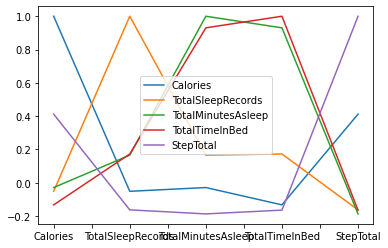

In [106]:
meged_cl_sle_steps =meged_cl_sle.merge(steps, left_on=["Id","Day" ], right_on=["Id", "Day"])
meged_cl_sle_steps.drop(columns=["Id"], inplace= False).corr().plot()


In [85]:
calories = read_file(data_csvs[0])
calories[]


../Data\dailyActivity_merged.csv


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.480000,6.480000,0.0,3.19,0.78,2.51,0.00,38,20,164,539,1728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [36]:
steps = read_file(data_csvs[3])
steps['ActivityDay'] = pd.to_datetime(steps['ActivityDay'])


../Data\dailySteps_merged.csv


## Heart Rate Exploration

In [107]:
heart_rate = read_file(dailyData[4])
heart_rate.groupby('Id').count()

../Data\heartrate_seconds_merged.csv


,Time,Value
Id,,
2022484408,154104,154104
2026352035,2490,2490
2347167796,152683,152683
4020332650,285461,285461
4388161847,249748,249748
4558609924,192168,192168
5553957443,255174,255174
5577150313,248560,248560
6117666160,158899,158899


In [ ]:
pd.to_datetime(heart_rate["Time"][:2]).dt.minute


0    21
1    21
Name: Time, dtype: int64

In [ ]:
heart_rate.Time.str.split(" ")[0] #  format = '%Y-%m-%d %I-%p'
heart_rate.Time[0] 

'4/12/2016 7:21:00 AM'

In [108]:
heart_rate.Time

0          4/12/2016 7:21:00 AM
1          4/12/2016 7:21:05 AM
2          4/12/2016 7:21:10 AM
3          4/12/2016 7:21:20 AM
4          4/12/2016 7:21:25 AM
                   ...         
2483653    5/12/2016 2:43:53 PM
2483654    5/12/2016 2:43:58 PM
2483655    5/12/2016 2:44:03 PM
2483656    5/12/2016 2:44:18 PM
2483657    5/12/2016 2:44:28 PM
Name: Time, Length: 2483658, dtype: object

In [109]:
HeartRateFiltered = divideInsertTime(heart_rate, "Time")

Could Not Prase Data: Check Col Name; Erorr: (<class 'NameError'>, NameError("name 'Heart_By_Idx' is not defined"), <traceback object at 0x0000024F84ECE140>)


In [111]:
HeartRateFiltered

Id        int64
Time     object
Value     int64
dtype: object

In [114]:
Heart_By_Idx = HeartRateFiltered.set_index("Id")
Id_To_Idx = {id :num for num,id in enumerate(Heart_By_Idx.index.unique())}
Heart_By_Idx['PersonID'] = Heart_By_Idx.index.map(Id_To_Idx)

Heart_By_Idx.Time = pd.to_datetime(Heart_By_Idx.Time)

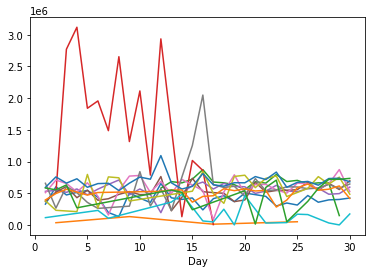

In [ ]:
for i in range(13):
    Heart_By_Idx.loc[Heart_By_Idx.PersonID ==i].groupby('Day').sum()['Value'].plot()

 std: 0.012404660099056417
max: 0.6545454545454545
min: -0.3151515151515152
amount of drastic changes: 31


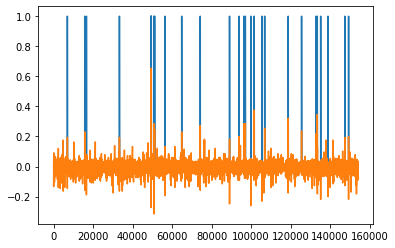

 std: 0.03425202333779087
max: 0.5806451612903225
min: -0.37096774193548376
amount of drastic changes: 1


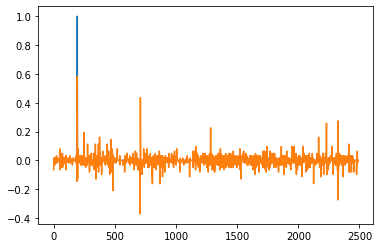

 std: 0.015717302156060965
max: 0.6095890410958905
min: -0.363013698630137
amount of drastic changes: 28


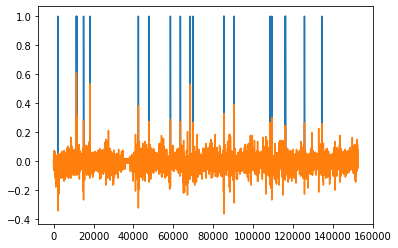

 std: 0.007616525667478592
max: 0.37241379310344835
min: -0.6827586206896552
amount of drastic changes: 130


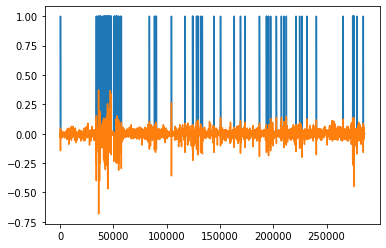

 std: 0.017295734394618005
max: 0.375886524822695
min: -0.35460992907801414
amount of drastic changes: 17


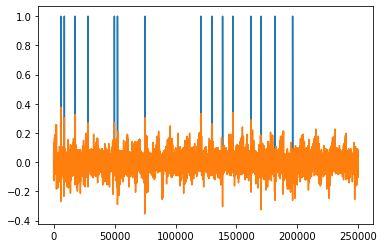

 std: 0.01570269668135725
max: 0.45806451612903226
min: -0.4258064516129032
amount of drastic changes: 37


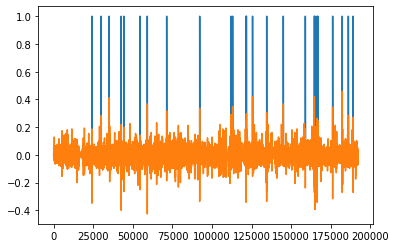

 std: 0.013330519505707884
max: 0.6610169491525423
min: -0.3220338983050848
amount of drastic changes: 21


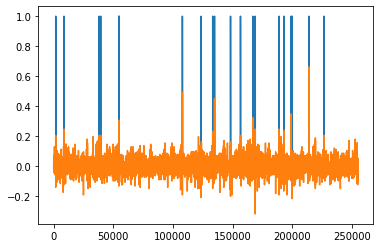

 std: 0.015005594032544799
max: 0.572463768115942
min: -0.6956521739130436
amount of drastic changes: 119


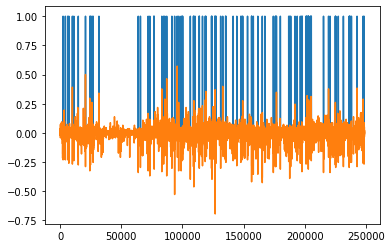

 std: 0.01785328784836719
max: 0.7226277372262774
min: -0.39416058394160586
amount of drastic changes: 15


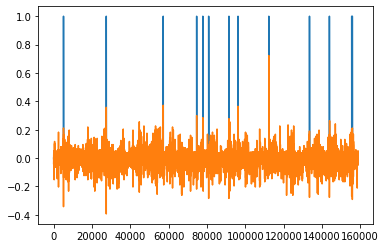

 std: 0.02227297419360664
max: 0.5737704918032787
min: -0.8770491803278688
amount of drastic changes: 16


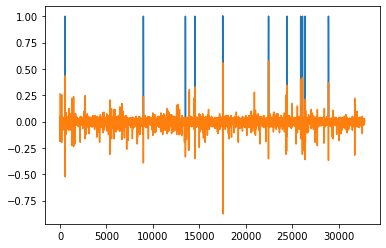

 std: 0.014078201477394867
max: 0.6496350364963505
min: -0.6058394160583942
amount of drastic changes: 37


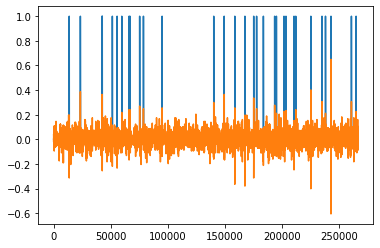

 std: 0.018659165676890143
max: 0.39285714285714285
min: -0.4374999999999999
amount of drastic changes: 24


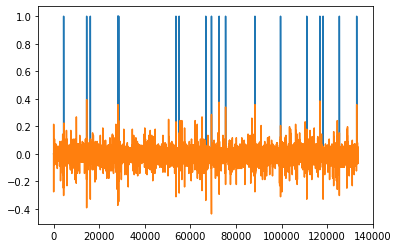

 std: 0.020446257655366132
max: 0.5304347826086957
min: -0.4956521739130435
amount of drastic changes: 30


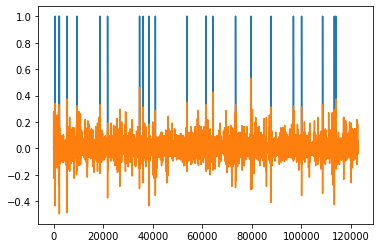

In [218]:
for i in range(13):
    data_= np.array(Heart_By_Idx.loc[Heart_By_Idx.PersonID ==i].Value)
    data_ = data_/ (data_.max()- data_.min())
    diff_ = np.array([data_[curr] - data_[curr-1] for curr in range(1,len(data_))])
    print(f" std: {diff_.std()}")
    print(f"max: {diff_.max()}")
    print(f"min: {diff_.min()}")

    amount_of_unusual_changes = np.where(np.abs(diff_) >=15* np.abs(diff_.std()),1,0)
    print(f"amount of drastic changes: {amount_of_unusual_changes.sum()}")

    plt.plot(amount_of_unusual_changes)
    plt.plot(diff_)	#plot the points
    
    plt.show()
    # input()

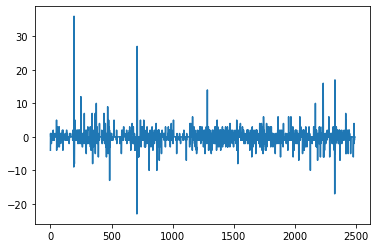

In [166]:
sleepRate = read_file(data_csvs[-2])
sleepRate

sleepDay_merged.csv


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [48]:
pd.to_datetime(heart_rate.Time)

KeyboardInterrupt: 

In [22]:
pd.Timestamp('2014-01-23 00:00:00', tz=None).to_pydatetime()

df= read_file(data_csvs[4])
df.dropna(subset=list(df.columns), how='any', axis=0).reset_index(inplace = True)

df['Time'] = pd.to_datetime(df['Time']).dt.date

heartrate_seconds_merged.csv
['Id', 'Time', 'Value']


In [155]:
Sleepingdata= read_file(data_csvs[-2])
sleep_ID= Sleepingdata.Id.unique()


sleepDay_merged.csv
['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']


In [148]:
print(sleep_ID== unique_ID)

False


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\4166130050.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(sleep_ID== unique_ID)


In [156]:
data2= read_file(data_csvs[4])
print(f"Number of measured Heart Beat Perople:")
print( {len(data2.groupby("Id").count())})
unique_ID= data2.Id.unique()


heartrate_seconds_merged.csv
['Id', 'Time', 'Value']
Number of measured Heart Beat Perople:
{14}


In [162]:
print((list(unique_ID))

None


In [165]:
sum_

12

In [118]:
p2_2.describe()


p2_2.drop(columns={'LightlyActiveMinutes', 'FairlyActiveMinutes','SedentaryActiveDistance','ModeratelyActiveDistance'}, inplace= True, errors=True)

p2_2

KeyError: "['LightlyActiveMinutes', 'FairlyActiveMinutes', 'ModeratelyActiveDistance', 'SedentaryActiveDistance'] not found in axis"

In [111]:
data2= read_file(data_csvs[2])
p2_2= data2[data2.Id ==1503960366]

datasleep= read_file(data_csvs[-2])
p1 = datasleep[datasleep.Id ==1503960366]
p1.rename(columns={'SleepDay': 'Date'},
          inplace=True, errors='raise')
p2_2.rename(columns={'ActivityDay': 'Date'},
          inplace=True, errors='raise')

p1.Date = p1.Date.str.slice(0, -11,1)

# d = p1.SleepDay.apply(lambda x: dt.datetime.strptime(x,infer_datetime_format=True))
# p1['SleepDay'] = pd.to_datetime(p1['SleepDay']) 

pd.merge(p2_2, p1)
# Intensives= data2.groupby("Id").sum()[['TotalSteps','Calories' ]]

dailyIntensities_merged.csv
['Id', 'ActivityDay', 'SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes', 'SedentaryActiveDistance', 'LightActiveDistance', 'ModeratelyActiveDistance', 'VeryActiveDistance']
sleepDay_merged.csv
['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3863648179.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1.rename(columns={'SleepDay': 'Date'},
C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3863648179.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2_2.rename(columns={'ActivityDay': 'Date'},
C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3863648179.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,Id,Date,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed


In [109]:

p2_2

,Id,Date,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71
5,1503960366,4/17/2016,539,164,20,38,0.0,2.51,0.78,3.19
6,1503960366,4/18/2016,1149,233,16,42,0.0,4.71,0.64,3.25
7,1503960366,4/19/2016,775,264,31,50,0.0,5.03,1.32,3.53
8,1503960366,4/20/2016,818,205,12,28,0.0,4.24,0.48,1.96
9,1503960366,4/21/2016,838,211,8,19,0.0,4.65,0.35,1.34


In [ ]:
data2= read_file(data_csvs[2])
data2[data2.Id ==1503960366].ActivityDay


In [33]:
data0= read_file(data_csvs[4])
steps_Calories= data0.groupby("Id").sum()[['TotalSteps','Calories' ]]

,TotalSteps,Calories
Id,,
1503960366,375619,56309
1624580081,178061,45984
1644430081,218489,84339
1844505072,79982,48778
1927972279,28400,67357
2022484408,352490,77809
2026352035,172573,47760
2320127002,146223,53449
2347167796,171354,36782
